In [42]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
pd.set_option('display.max_columns', None)

In [43]:
def load_csv(path):
    full = os.path.join('diabetes', path)
    return pd.read_csv(full)

original = load_csv('diabetic_data_balanced.csv')
df = original.copy()

In [44]:
df, labels = df.drop('readmitted', axis=1), df['readmitted']

In [45]:
to_drop = ['weight', 'payer_code', 'encounter_id', 'patient_nbr', 'diag_3', 'medical_specialty', 'race', 'diag_1', 'diag_2']
df = df.drop(to_drop, axis=1)

In [46]:
cat_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Male,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Steady,chlorpropamide_Steady,glimepiride_No,glimepiride_Steady,glimepiride_Up,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Steady,acarbose_Up,miglitol_Steady,troglitazone_Steady,tolazamide_Steady,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Steady,change_No,diabetesMed_Yes
0,6,25,1,1,41,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,1,7,3,59,0,18,0,0,0,9,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1,1,7,2,11,5,13,2,0,1,6,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1
3,1,1,7,2,44,1,16,0,0,0,7,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,1,1,7,1,51,0,8,0,0,0,5,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2,1,1,3,49,0,21,0,0,1,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
9995,2,1,1,1,43,2,7,0,0,0,5,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
9996,1,3,5,4,64,0,7,0,0,0,9,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
9997,6,1,17,1,72,0,14,0,0,0,8,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1


In [47]:
no_noise = df.copy()
df['noise'] = np.random.random(len(df))

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_all, y_all = df.values, labels.values

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, stratify=y_all, test_size=0.2)

print(f"Shape of train: {X_train.shape}, {y_train.shape}")
print(f"Shape of test: {X_test.shape}, {y_test.shape}")

Shape of train: (7999, 63), (7999,)
Shape of test: (2000, 63), (2000,)


OOB score: 0.49693711713964245


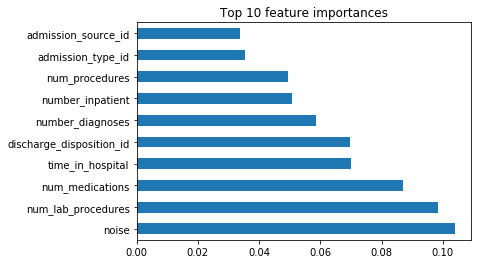

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=100, n_jobs=3, random_state=42, oob_score=True, criterion='entropy')
model.fit(X_train, y_train)
print("OOB score:", model.oob_score_)
imp = model.feature_importances_

top_n = 10
feat_importances = pd.Series(model.feature_importances_, index=df.columns)
feat_importances.nlargest(top_n).plot(kind='barh')
plt.title(f"Top {top_n} feature importances")
plt.show()